<a href="https://colab.research.google.com/github/TEXA008/WSAGAScript/blob/main/NM_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load the dataset
df = pd.read_csv('/content/solar_power_data_Lab-1(in).csv')
df.head() #show the first 5 rows of the dataset


,Solar_Irradiance,Temperature,Humidity,Wind_Speed,Solar_Power_Output
0,499.632095,15.785730,61.362532,0.516817,242.306199
1,960.571445,30.910260,16.731197,5.313546,567.172033
2,785.595153,22.858900,22.930297,5.406351,476.643086
3,678.926787,27.714267,81.884335,6.374299,275.195683
4,324.814912,37.689162,58.514325,7.260913,210.959177


In [3]:
#understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solar_Irradiance    100 non-null    float64
 1   Temperature         100 non-null    float64
 2   Humidity            100 non-null    float64
 3   Wind_Speed          100 non-null    float64
 4   Solar_Power_Output  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [4]:
df.describe()
#Summary of the dataset

,Solar_Irradiance,Temperature,Humidity,Wind_Speed,Solar_Power_Output
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,576.144595,27.445793,51.408106,4.911489,294.078188
std,237.991529,7.327781,23.474100,2.934522,137.333116
min,204.417694,15.173803,10.404927,0.143935,-3.978624
25%,354.560609,21.050113,32.150389,2.496149,202.994494
50%,571.313964,27.640621,55.004395,5.097183,297.057572
75%,784.162495,34.154590,70.189355,7.357775,387.197608
max,989.509549,39.641261,89.204308,9.905051,593.505982


In [6]:
#Prepare data for training
X = df[['Solar_Irradiance','Temperature','Humidity','Wind_Speed']]
y = df['Solar_Power_Output']

In [7]:
#Splitting the dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=model.predict(X_test)

In [10]:
#evaluate model
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 39.34081969225015
Root Mean Squared Error: 48.5312333501688
R-squared: 0.8217863138584447


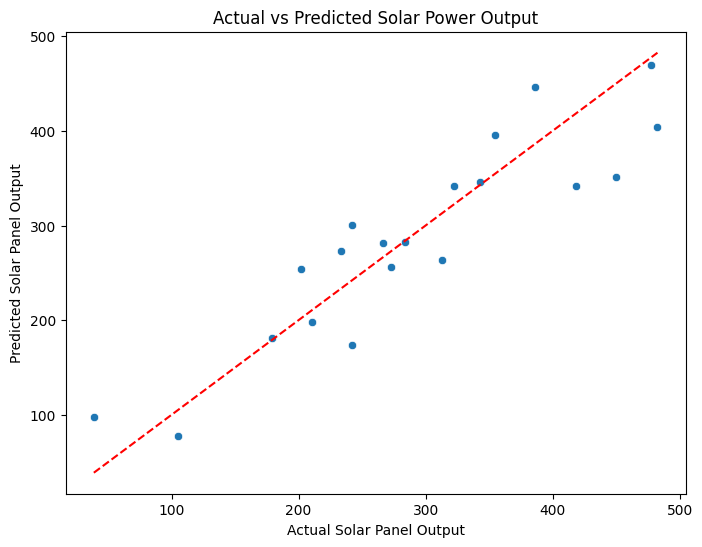

In [17]:
#visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='dashed')
plt.xlabel("Actual Solar Panel Output")
plt.ylabel("Predicted Solar Panel Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()